In [43]:
import tensorflow as tf
import commentjson
from box import Box
from pprint import pprint
import os
from glob import glob
import multiprocessing
import numpy as np
import cv2
import json
import copy
from matplotlib import pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

In [23]:
def load_json(path):
    """The function of loading json file

    Arguments:
        path {str} -- The path of the json file

    Returns:
        list, dict -- The obj stored in the json file
    """
    with open(path, 'r') as f:
        data = json.load(f)
    return data

# rounding PDE

In [61]:
quan_path = "/aidata/anders/objects/landmarks/AFLW/archive_model/noDIV/qeval.json"
quan_annos = load_json(quan_path)
path = "/aidata/anders/objects/landmarks/AFLW/archive_model/noDIV/eval.json"
# path = "/aidata/anders/objects/landmarks/demo_test/annos/BDD_test_NEW.json"
gt_annos = load_json(path)

In [62]:
shifting_infos = {}
kp_info = {'left_eye_lnmk_27':[], 
           'right_eye_lnmk_33':[], 
           'nose_lnmk_42':[], 
           'outer_lip_lnmk_48':[], 
           'outer_lip_lnmk_54':[]
          }
for i, (gt_frame, quan_frame) in enumerate(zip(gt_annos["frame_list"], quan_annos["frame_list"])):
    for gt_lb, qeval_lb in zip(gt_frame["labels"], quan_frame["labels"]):
        gt_keypoints = gt_lb['keypoints']
        qeval_keypoints = qeval_lb['keypoints']
        keys = qeval_keypoints.keys()
        for key in keys:
            gt_kp = np.asarray(gt_keypoints[key])
            qeval_kp = np.asarray(qeval_keypoints[key])
            rounding_shift = gt_kp - qeval_kp
            kp_info[key].append(rounding_shift.tolist())


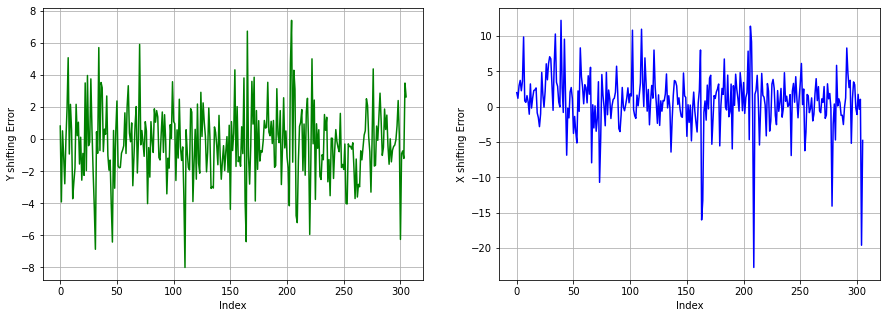

In [63]:
LE = np.asarray(kp_info["left_eye_lnmk_27"])
m = LE.shape[0] 
index = list(range(m)) 
LE_y = LE[:, 0] 
LE_x = LE[:, 1]
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.plot(index, LE_y, color='green')
ax1.set_ylabel('Y shifting Error')
ax1.set_xlabel('Index')
plt.grid()

ax2 = plt.subplot(122)
ax2.plot(index, LE_x, color='blue')
ax2.set_ylabel('X shifting Error')
ax2.set_xlabel('Index')
plt.grid()



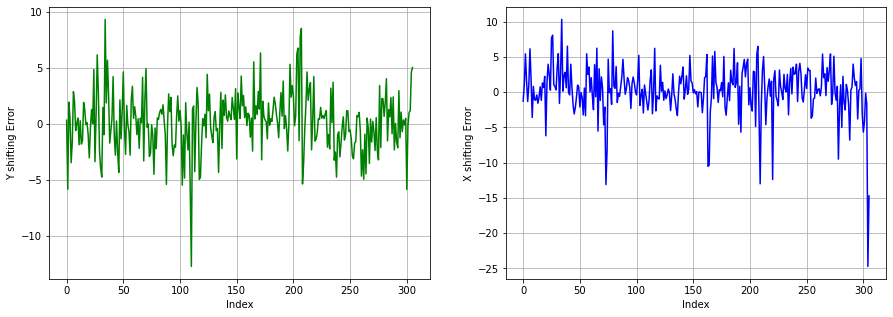

In [64]:
RE = np.asarray(kp_info["right_eye_lnmk_33"])
m = RE.shape[0] 
index = list(range(m)) 
RE_y = RE[:, 0] 
RE_x = RE[:, 1]
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.plot(index, RE_y, color='green')
ax1.set_ylabel('Y shifting Error')
ax1.set_xlabel('Index')
plt.grid()

ax2 = plt.subplot(122)
ax2.plot(index, RE_x, color='blue')
ax2.set_ylabel('X shifting Error')
ax2.set_xlabel('Index')
plt.grid()


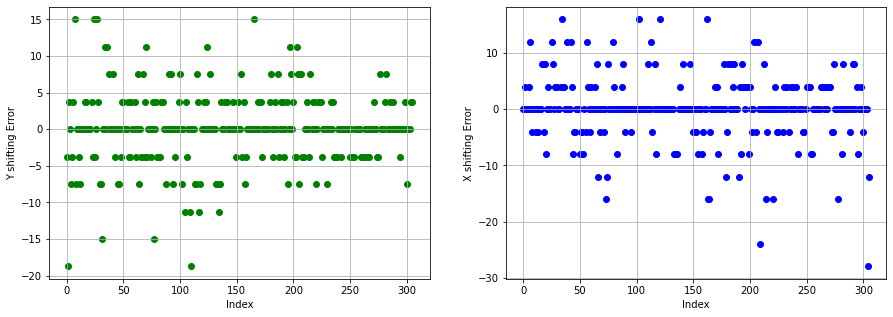

In [68]:
N = np.asarray(kp_info["nose_lnmk_42"])
m = N.shape[0] 
index = list(range(m)) 
N_y = N[:, 0] 
N_x = N[:, 1]
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.scatter(index, N_y, color='green')
ax1.set_ylabel('Y shifting Error')
ax1.set_xlabel('Index')
plt.grid()

ax2 = plt.subplot(122)
ax2.scatter(index, N_x, color='blue')
ax2.set_ylabel('X shifting Error')
ax2.set_xlabel('Index')
plt.grid()

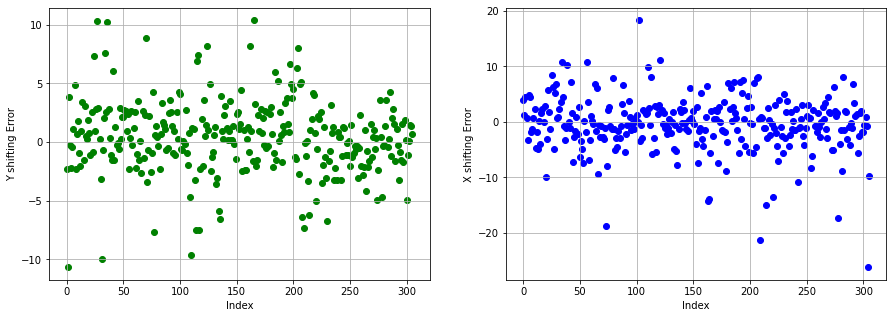

In [66]:
LM = np.asarray(kp_info["outer_lip_lnmk_48"])
m = LM.shape[0] 
index = list(range(m)) 
LM_y = LM[:, 0] 
LM_x = LM[:, 1]
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.scatter(index, LM_y, color='green')
ax1.set_ylabel('Y shifting Error')
ax1.set_xlabel('Index')
plt.grid()

ax2 = plt.subplot(122)
ax2.scatter(index, LM_x, color='blue')
ax2.set_ylabel('X shifting Error')
ax2.set_xlabel('Index')
plt.grid()

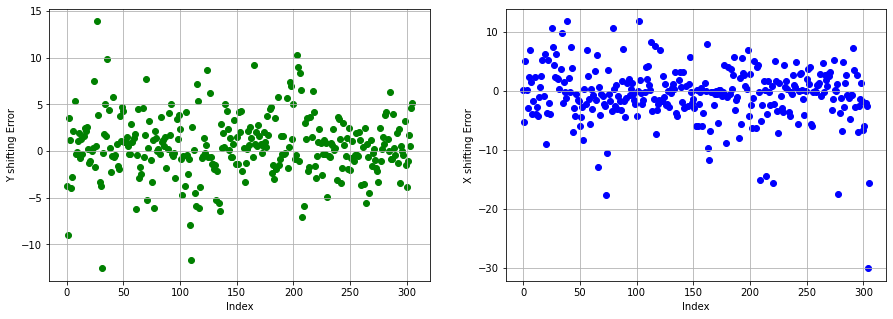

In [67]:
RM = np.asarray(kp_info["outer_lip_lnmk_54"])
m = LM.shape[0] 
index = list(range(m)) 
RM_y = RM[:, 0] 
RM_x = RM[:, 1]
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.scatter(index, RM_y, color='green')
ax1.set_ylabel('Y shifting Error')
ax1.set_xlabel('Index')
plt.grid()

ax2 = plt.subplot(122)
ax2.scatter(index, RM_x, color='blue')
ax2.set_ylabel('X shifting Error')
ax2.set_xlabel('Index')
plt.grid()